Data Processing Script Manual 


NN_Collect_V2.py 

This Script is designed to produce a program with a graphical UI to input labeling data when proforming shear vain testing on site to calibrate/train the machine learning algorthm.

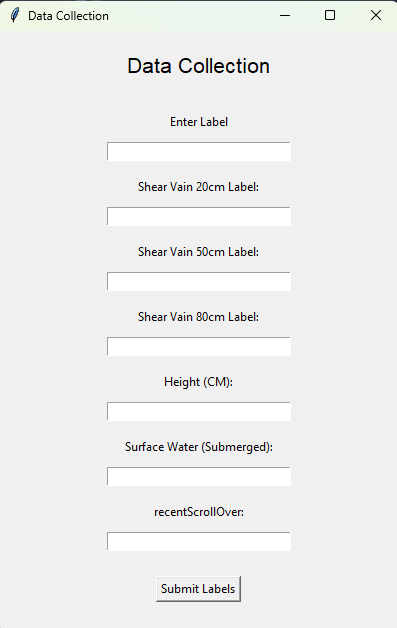

import required librarys 


In [ ]:
import tkinter as tk
from tkinter import messagebox
import json
import os
from datetime import datetime

Every time the submit button in the image above is pressed/clicked it will save a data.json file to the filepath in the section below.  

In [ ]:
# Define the hardcoded save directory (you can change this to your desired path)
SAVE_DIRECTORY = r"C:\Users\JoshuaPaterson\Phibion Pty Ltd\IG88 - General\03 Development\Dielectric Antenna\Predictive Model Training\Data Processing Scripts\Data"  # Replace this with your desired path

the code below contains the logic of the submit button

In [ ]:
# Function to handle button click event
def submit_labels():
    # Get the input data from the form fields
    label_value = command_input.get()
    shear_vain_20cm_value = shear_vain_20cm_input.get()
    shear_vain_50cm_value = shear_vain_50cm_input.get()
    shear_vain_80cm_value = shear_vain_80cm_input.get()
    height_value = height_input.get()
    surface_water_value = surface_water_input.get()  # Get the new Surface Water input
    recent_scroll_over_value = recent_scroll_over_input.get()

    # Prepare the data dictionary
    data = {
        "label": label_value,
        "shearVain20cm": shear_vain_20cm_value,
        "shearVain50cm": shear_vain_50cm_value,
        "shearVain80cm": shear_vain_80cm_value,
        "heightLabel": height_value,
        "surfaceWaterSubmerged": surface_water_value,  # Include the new Surface Water data
        "recentScrollOver": recent_scroll_over_value,
        "timestamp": datetime.utcnow().isoformat()  # Add a timestamp inside the data
    }

    # Create a unique filename using a timestamp
    timestamp_filename = datetime.utcnow().strftime("%Y-%m-%d_%H-%M-%S")
    filename = f"data_{timestamp_filename}.json"

    # Check if the save directory exists, if not, create it
    if not os.path.exists(SAVE_DIRECTORY):
        os.makedirs(SAVE_DIRECTORY)

    # Combine the hardcoded path with the filename
    file_path = os.path.join(SAVE_DIRECTORY, filename)

    # Save the data to a JSON file
    try:
        with open(file_path, 'w') as json_file:
            json.dump(data, json_file, indent=4)
        messagebox.showinfo("Success", f"Data saved to {file_path}")
    except Exception as e:
        messagebox.showerror("Error", f"Failed to save data: {e}")

the below code loads the UI elements into a object. 

In [ ]:
# Create the main window
root = tk.Tk()
root.title("Data Collection")

# Set the window size
root.geometry("400x600")  # Increased height to accommodate the new input field

# Create a label for the main heading
label = tk.Label(root, text="Data Collection", font=("Helvetica", 16))
label.pack(pady=20)

# Create the input fields and labels
command_input_label = tk.Label(root, text="Enter Label")
command_input_label.pack(pady=(10, 5))

command_input = tk.Entry(root, width=30)
command_input.pack(pady=5)

shear_vain_20cm_label = tk.Label(root, text="Shear Vain 20cm Label:")
shear_vain_20cm_label.pack(pady=(10, 5))

shear_vain_20cm_input = tk.Entry(root, width=30)
shear_vain_20cm_input.pack(pady=5)

shear_vain_50cm_label = tk.Label(root, text="Shear Vain 50cm Label:")
shear_vain_50cm_label.pack(pady=(10, 5))

shear_vain_50cm_input = tk.Entry(root, width=30)
shear_vain_50cm_input.pack(pady=5)

shear_vain_80cm_label = tk.Label(root, text="Shear Vain 80cm Label:")
shear_vain_80cm_label.pack(pady=(10, 5))

shear_vain_80cm_input = tk.Entry(root, width=30)
shear_vain_80cm_input.pack(pady=5)

height_label = tk.Label(root, text="Height (CM):")
height_label.pack(pady=(10, 5))

height_input = tk.Entry(root, width=30)
height_input.pack(pady=5)

# Add the new Surface Water (Submerged) input field
surface_water_label = tk.Label(root, text="Surface Water (Submerged):")
surface_water_label.pack(pady=(10, 5))

surface_water_input = tk.Entry(root, width=30)
surface_water_input.pack(pady=5)

# Add the new Surface Water (Submerged) input field
recent_scroll_over_label = tk.Label(root, text="recentScrollOver:")
recent_scroll_over_label.pack(pady=(10, 5))

recent_scroll_over_input = tk.Entry(root, width=30)
recent_scroll_over_input.pack(pady=5)

# Create a Submit Button (enabled by default)
submit_button = tk.Button(root, text="Submit Labels", command=submit_labels)
submit_button.pack(pady=20)

# Create a label for loading status (initially hidden)
loading_label = tk.Label(root, text="Waiting for server response...", fg="blue")
loading_label.pack(pady=10)
loading_label.pack_forget()  # Initially hide the loading label

# Create an output label (initially empty)
output_label = tk.Label(root, text="")
output_label.pack(pady=10)

below code activates the object which will form a UI in the image at the top of the document.

In [3]:
# Start the Tkinter event loop
root.mainloop()